In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    '/Users/Beba/Documents/JupyterNotebooks/LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015 = y2015[:-2]

In [7]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.98589509,  0.98549107,  0.98610781,  0.98617905,  0.98577535,
        0.98525256,  0.9853947 ,  0.9838748 ,  0.98373231,  0.98351818])

In [8]:
print(y2015.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'emp_length' 'home_ownership'
 'annual_inc' 'verification_status' 'issue_d' 'loan_status' 'pymnt_plan'
 'purpose' 'title' 'dti' 'delinq_2yrs' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee' 'last_pymnt_d'
 'last_pymnt_amnt' 'next_pymnt_d' 'last_credit_pull_d'
 'collections_12_mths_ex_med' 'mths_since_last_major_derog' 'policy_code'
 'application_type' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal'
 'open_acc_6m' 'open_act_il' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'
 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_c

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns

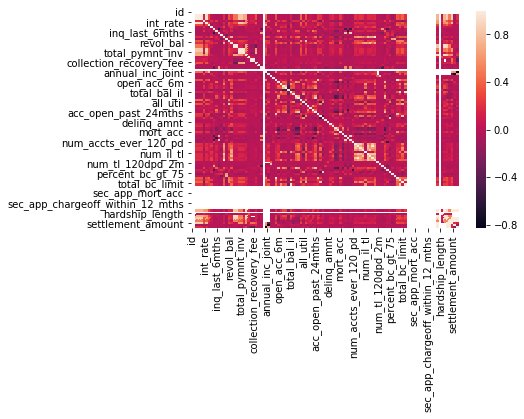

In [10]:
sns.heatmap(y2015.corr())

In [11]:
y2015_pca = y2015.filter(['loan_amnt',
                          'funded_amnt',
                          'funded_amnt_inv',
                          'term',
                          'int_rate',
                          'installment',
                          'grade',
                          'emp_length',
                          'home_ownership',
                          'annual_inc',
                          'verification_status',
                          'issue_d',
                          'pymnt_plan',
                          'purpose',
                          'title',
                          'dti',
                          'delinq_2yrs',
                          'inq_last_6mths',
                          'mths_since_last_delinq',
                          'mths_since_last_record',
                          'open_acc',
                          'pub_rec',
                          'revol_bal',
                          'total_acc',
                          'initial_list_status',
                          'out_prncp',
                          'out_prncp_inv',
                          'total_pymnt',
                          'total_pymnt_inv',
                          'total_rec_prncp',
                          'total_rec_int',
                          'total_rec_late_fee',
                          'recoveries',
                          'collection_recovery_fee',
                          'last_pymnt_d',
                          'last_pymnt_amnt',
                          'next_pymnt_d',
                          'last_credit_pull_d',
                          'collections_12_mths_ex_med',
                          'mths_since_last_major_derog',
                          'policy_code',
                          'application_type',
                          'annual_inc_joint',
                          'dti_joint',
                          'verification_status_joint',
                          'acc_now_delinq',
                          'tot_coll_amt',
                          'tot_cur_bal',
                          'open_acc_6m',
                          'open_act_il'])

In [12]:
X_dummies = pd.get_dummies(y2015_pca)
X_clean = X_dummies.dropna(axis=1)

cross_val_score(rfc, X_clean, Y, cv=10)

array([ 0.98513523,  0.98546733,  0.98553788,  0.98598908,  0.98508668,
        0.98439763,  0.984611  ,  0.98439726,  0.98385105,  0.98437314])

In [13]:
y2015_pca2 = y2015.filter(['loan_amnt',
                          'term',
                          'int_rate',
                          'installment',
                          'grade',
                          'emp_length',
                          'home_ownership',
                          'verification_status',
                          'pymnt_plan',
                          'purpose',
                          'title',
                          'dti',
                          'delinq_2yrs',
                          'inq_last_6mths',
                          'recoveries',
                          'collection_recovery_fee',
                          'last_credit_pull_d',
                          'collections_12_mths_ex_med',
                          'mths_since_last_major_derog',
                          'open_acc_6m',
                          'open_act_il'])

In [14]:
X_dummies2 = pd.get_dummies(y2015_pca2)
X_clean2 = X_dummies2.dropna(axis=1)

cross_val_score(rfc, X_clean2, Y, cv=10)

array([ 0.70811863,  0.70557086,  0.70341962,  0.70890525,  0.7115412 ,
        0.70744971,  0.69689845,  0.70402299,  0.70376176,  0.69226019])

In [15]:
y2015_pca3 = y2015.filter(['loan_amnt',
                          'funded_amnt',
                          'term',
                          'int_rate',
                          'out_prncp',
                          'total_pymnt',
                          'total_rec_prncp',
                          'total_rec_late_fee',
                          'recoveries',
                          'collection_recovery_fee',
                          'last_pymnt_d',
                          'last_pymnt_amnt'])

X_dummies3 = pd.get_dummies(y2015_pca3)
X_clean3 = X_dummies3.dropna(axis=1)

cross_val_score(rfc, X_clean3, Y, cv=10)

array([ 0.97651557,  0.98399506,  0.98368559,  0.98446925,  0.98394681,
        0.98311525,  0.98211741,  0.98323359,  0.98363731,  0.98468188])

In [16]:
y2015_pca4 = y2015.filter(['loan_amnt',
                          'term',
                          'int_rate',
                          'total_rec_prncp',
                          'total_rec_late_fee',
                          'recoveries',
                          'collection_recovery_fee',])

X_dummies4 = pd.get_dummies(y2015_pca4)
X_clean4 = X_dummies4.dropna(axis=1)

cross_val_score(rfc, X_clean4, Y, cv=10)

array([ 0.84641322,  0.94044453,  0.92341487,  0.94312515,  0.93706958,
        0.93588069,  0.91680916,  0.92471739,  0.93564168,  0.92454936])